In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

In [3]:
#Load dataset
df = pd.read_csv("dataset\heart.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
#no of rows and columns
df.shape

(270, 14)

In [6]:
#getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

<b>age</b> ------ age in years <br>
<b>sex</b> ------ 1 = male, 0 = female<br>
<b>cp</b>  ------- chest pain type (value 1: typical type 1 angina, value 2: typical type angina,------------ value 3: non-angina pain; value 4: asymptomatic)<br>
<b>BP</b> ----- resting blood pressure (in mm Hg on admission to the hospital)<br>
<b>Cholesterol</b> ----- serum cholestoral in mg/dl<br>
<b>fbs ------</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
<b>ekg results</b> -- resting electrocardiographic result<br>
<b>max HR</b> ------ maximum heart rate achieved<br>
<b>exercise angina</b> ---- exercise induced angina (1 = yes; 0 = no)<br>
<b>ST depression</b> ---- ST depression induced by exercise relative to rest<br>
<b>slope of ST</b> ---- the slope of the peak exercise ST segment<br>
<b>no. of vessels</b> ------- number of major vessels (0-3) colored by flourosopy<br>
<b>Thallium </b>---- (value 3: normal; value 6: fixed defect; value 7:reversible defect)




In [7]:
#for first 5 rows
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
#for last 5 rows
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [9]:
##feature engineering
#To get null values of column
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<Axes: >

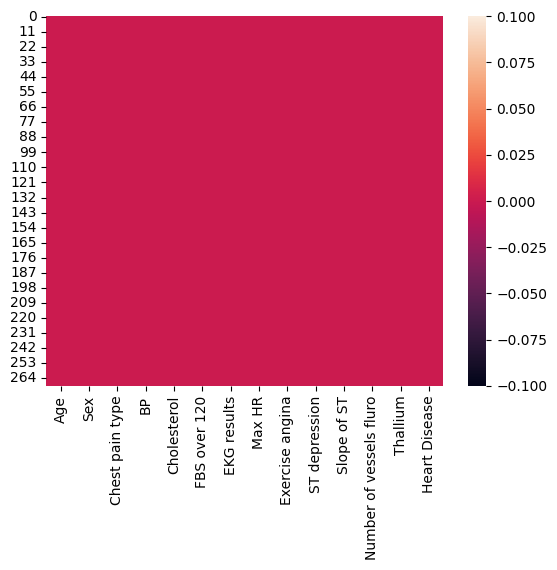

In [10]:
#heatmap to show null values
sns.heatmap(df.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [11]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [ ]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

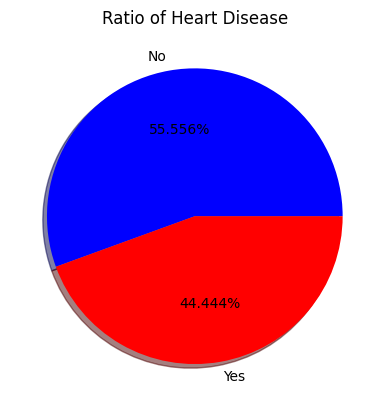

In [ ]:
#To show the presence and absence of Heart disease using pie chart
plt.pie(x = df['Heart Disease'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['blue', 'red'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()


<Axes: >

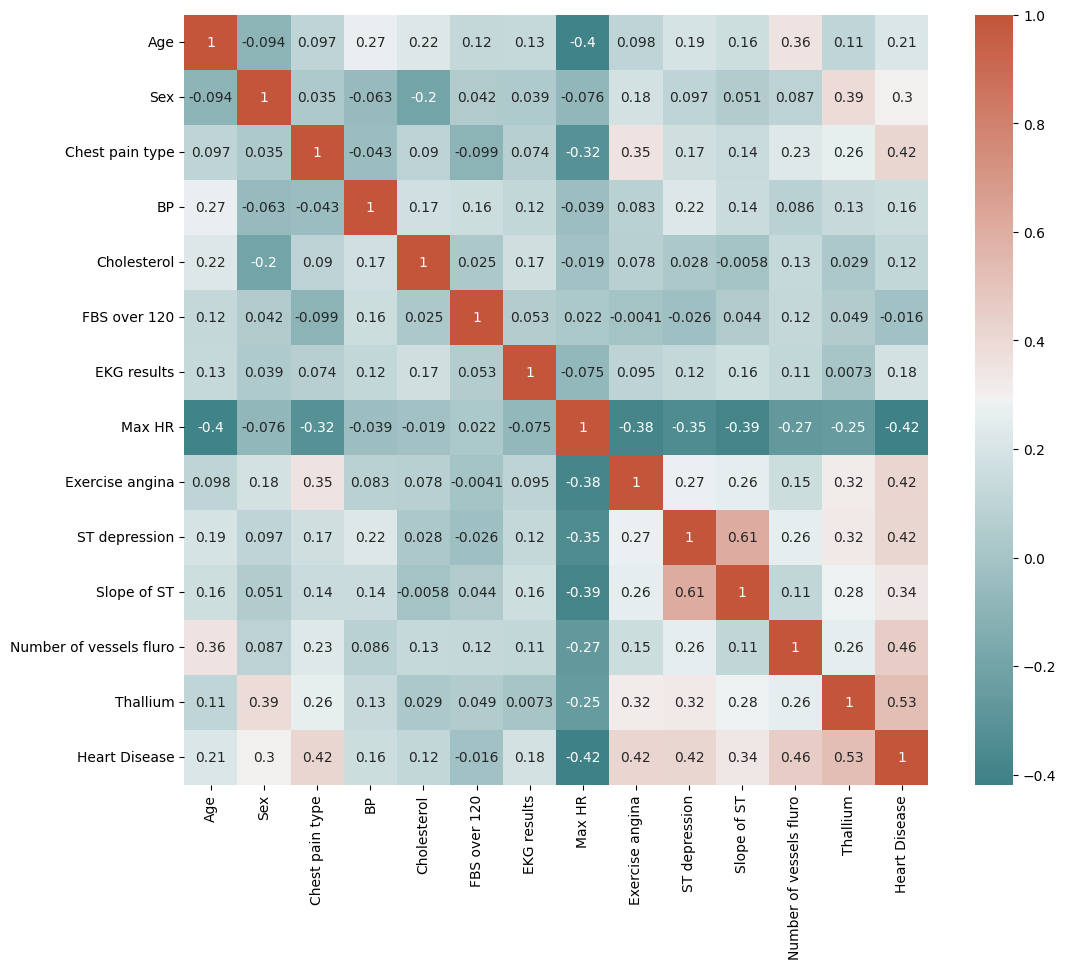

In [ ]:
#correlation matrix
#it is to find the dependency of column to target value
corr = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

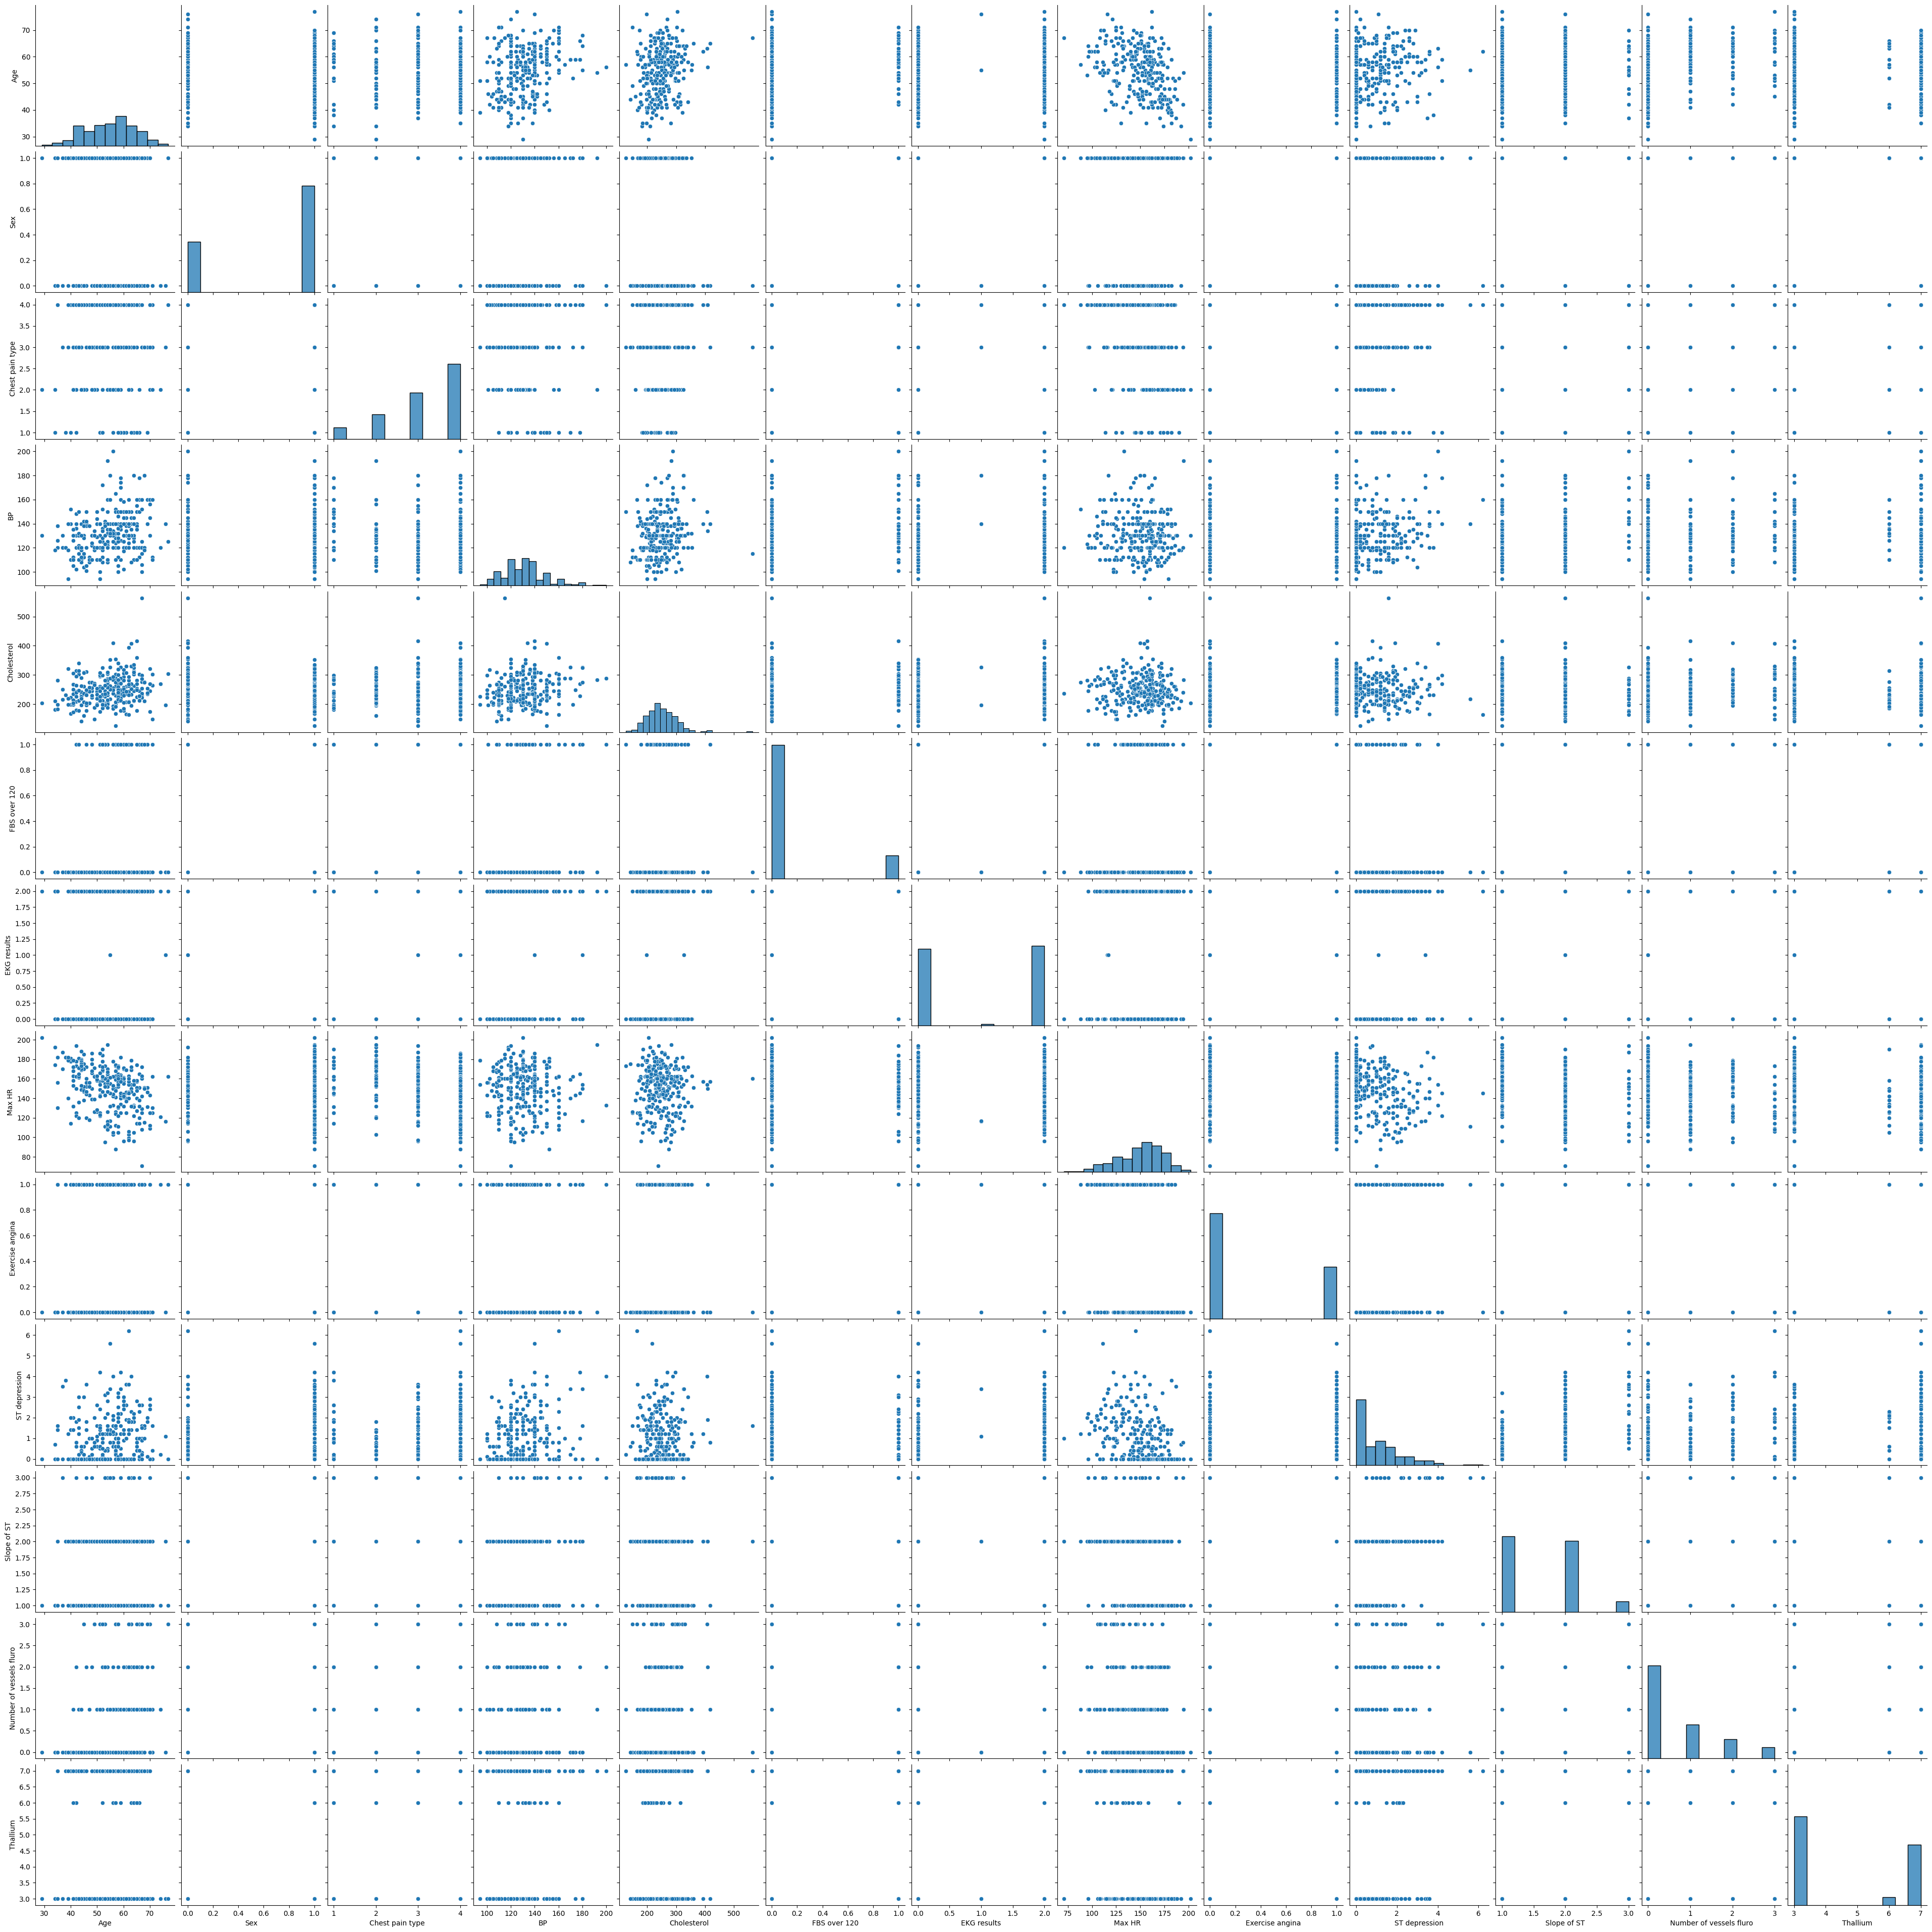

In [ ]:
#visualisation of relationships between variables within a dataset
sns.pairplot(df.drop(columns='Heart Disease') , height=3,aspect=1);

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest pain type'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FBS over 120'}>,
        <Axes: title={'center': 'EKG results'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercise angina'}>,
        <Axes: title={'center': 'ST depression'}>,
        <Axes: title={'center': 'Slope of ST'}>,
        <Axes: title={'center': 'Number of vessels fluro'}>],
       [<Axes: title={'center': 'Thallium'}>,
        <Axes: title={'center': 'Heart Disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

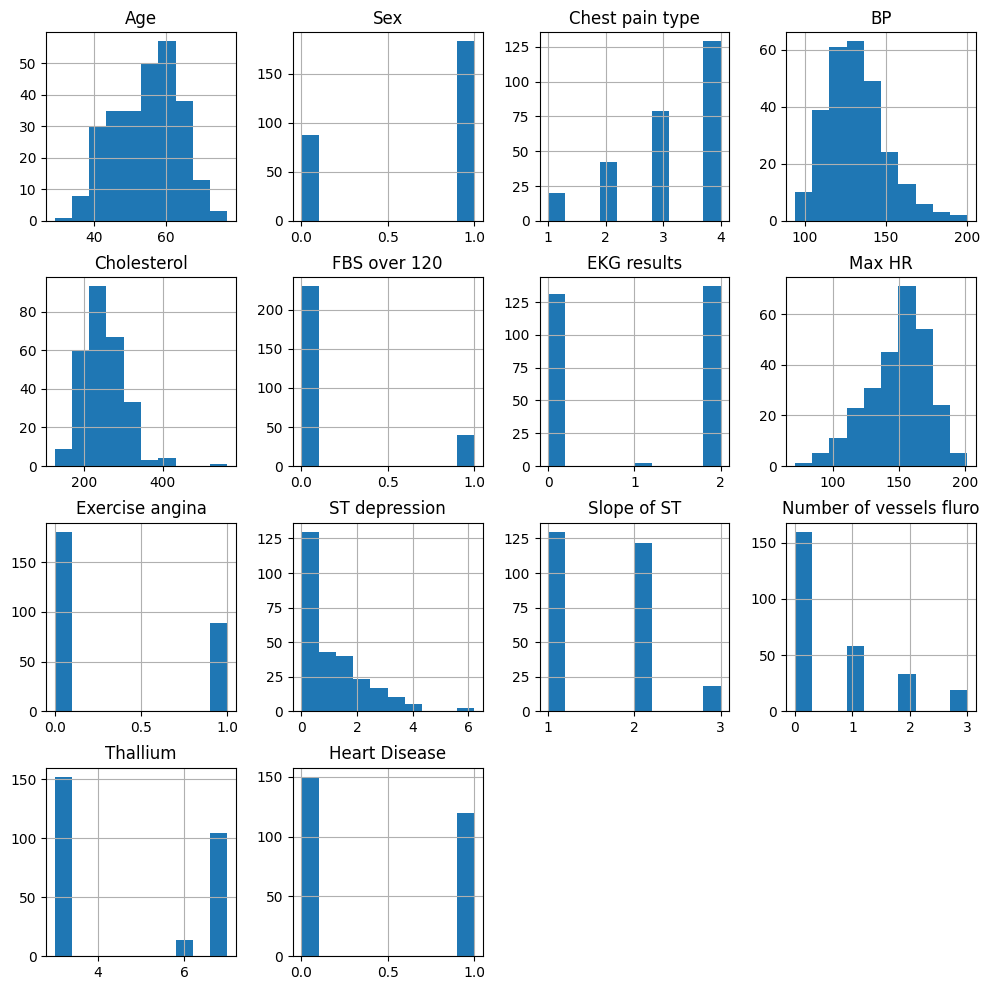

In [12]:
#to visualize the feature using histogram
df.hist(figsize=(12,12))

<Axes: xlabel='Age', ylabel='Heart Disease'>

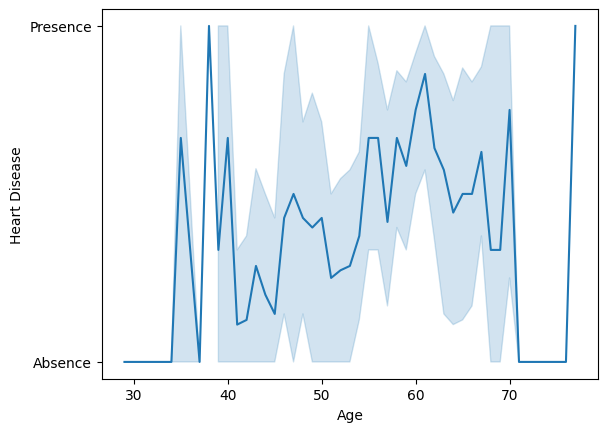

In [ ]:
#Line graph for heart disease vs age
sns.lineplot(data=df,x='Age',y='Heart Disease')

<Axes: xlabel='Thallium', ylabel='count'>

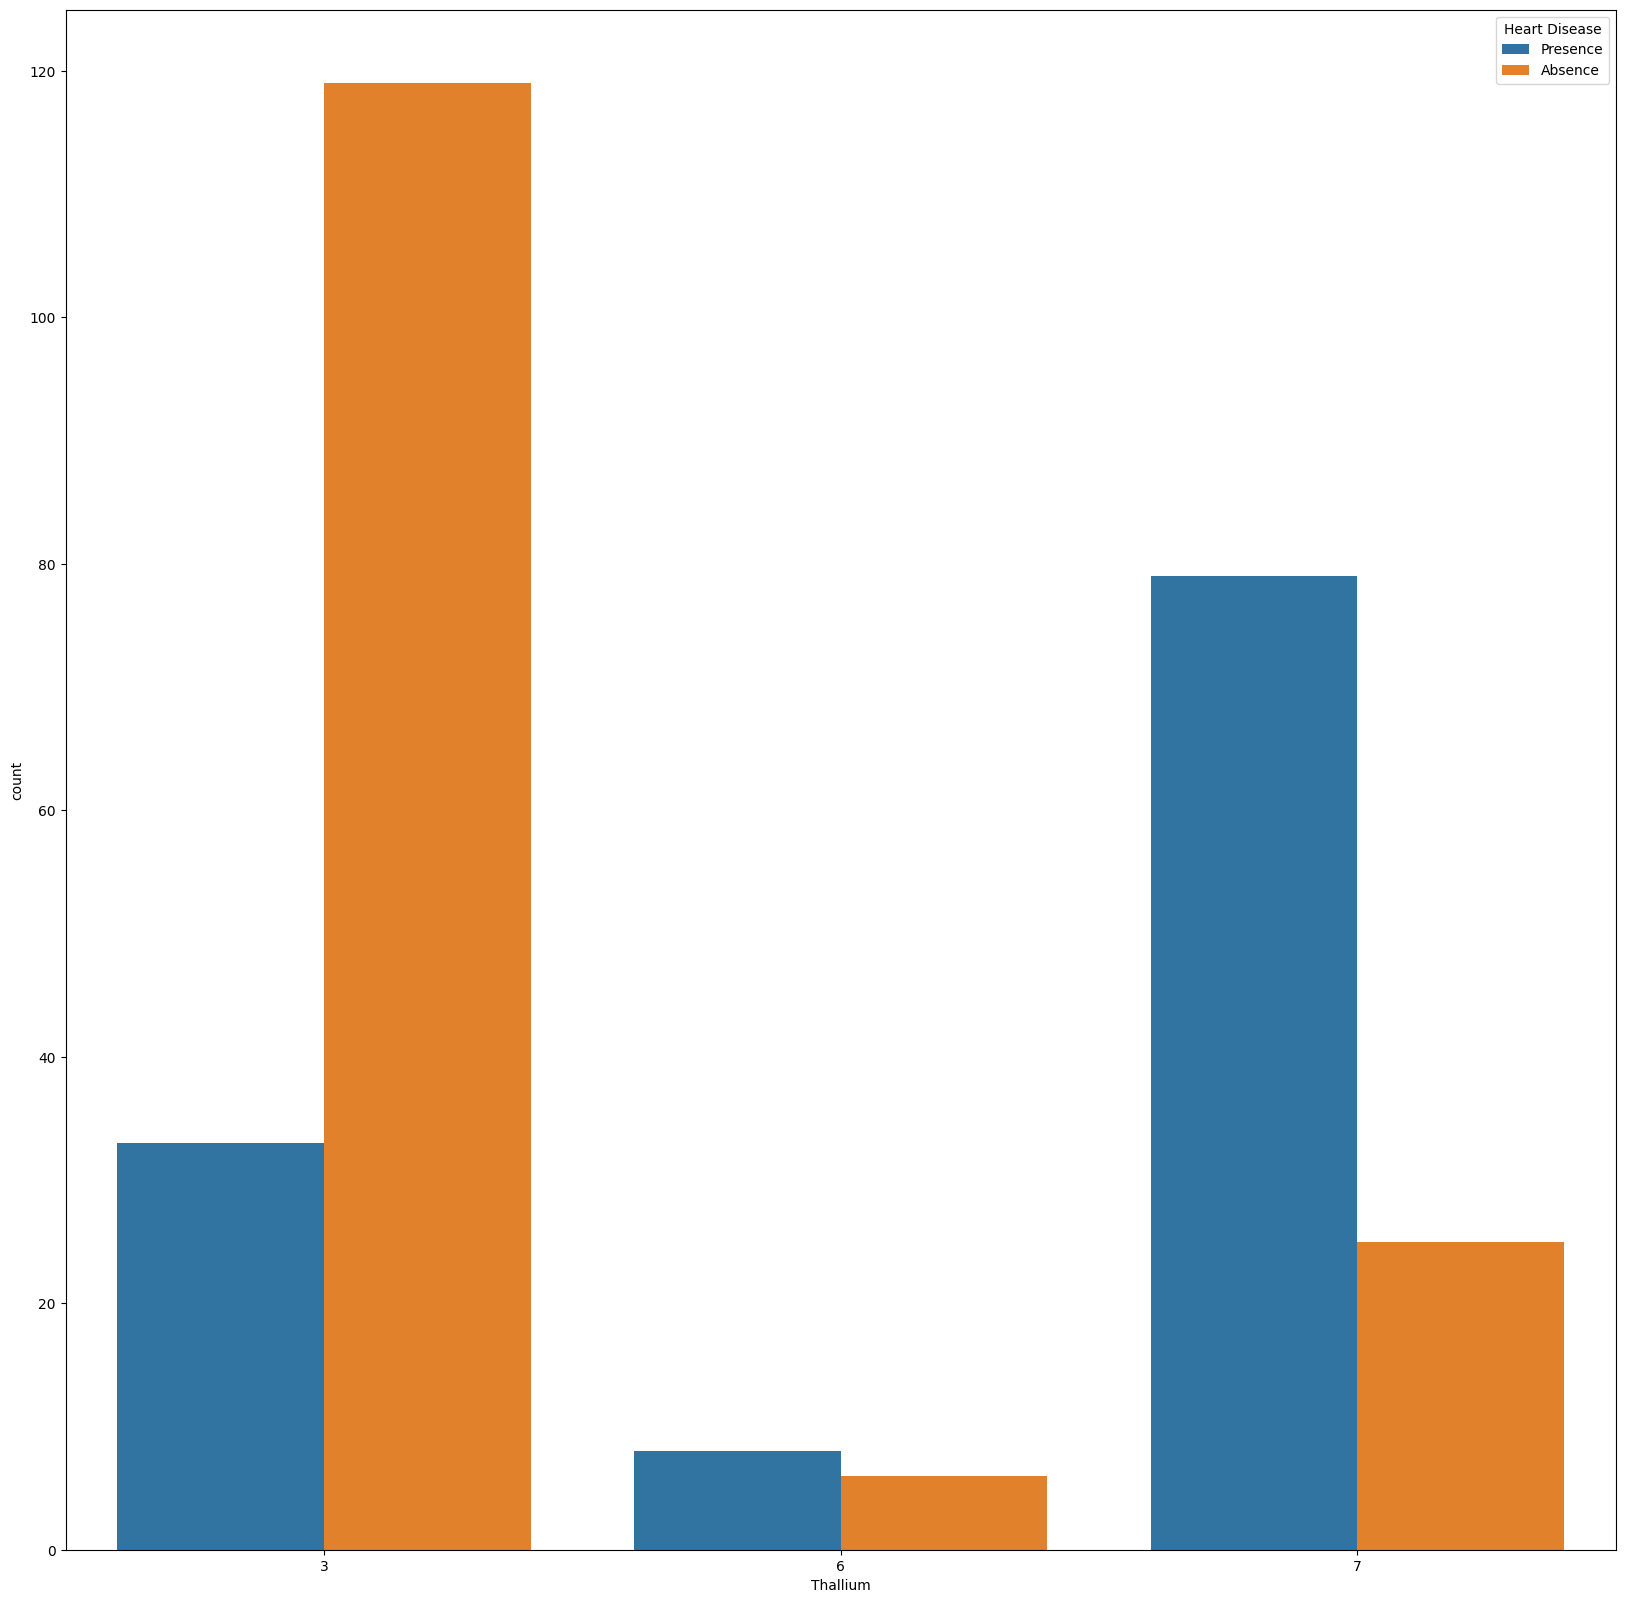

In [ ]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(20,20))
sns.countplot(data=df,hue='Heart Disease',x='Thallium')

In [ ]:
#statistical measures about the data
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
#Training and testing

In [14]:
X = df.iloc[:, :-1]
y = df["Heart Disease"]

In [15]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=None)

In [16]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (216, 13)
Shape of y_train (216,)
Shape of X_test (54, 13)
Shape of y_test (54,)


In [18]:
# Encoding the target value into numerical
# value using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Heart Disease"] = encoder.fit_transform(df["Heart Disease"])

In [19]:
df["Heart Disease"]

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

Decision Tree
ACCURACY score on train data 89.35185185185185
Accuracy Score on test data 85.18518518518519
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.70      0.88      0.78        16

    accuracy                           0.85        54
   macro avg       0.82      0.86      0.83        54
weighted avg       0.87      0.85      0.86        54
 

Confusion Matrix
 [[32  6]
 [ 2 14]]


<Axes: >

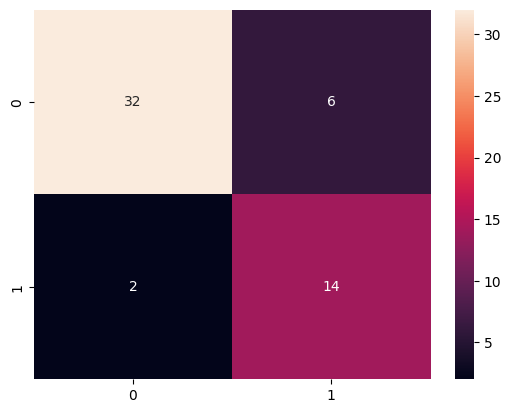

In [20]:
#Decision Tree
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( max_depth=5)
tree.fit(X_train, y_train)
pred=tree.predict(X_test)
acc=accuracy_score(y_test,pred)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, tree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [21]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')


Best choice of k: 12


KNN
ACCURACY score on train data 84.25925925925925
Accuracy Score on test data 92.5925925925926
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.83      0.94      0.88        16

    accuracy                           0.93        54
   macro avg       0.90      0.93      0.91        54
weighted avg       0.93      0.93      0.93        54
 

Confusion Matrix
 [[35  3]
 [ 1 15]]


<Axes: >

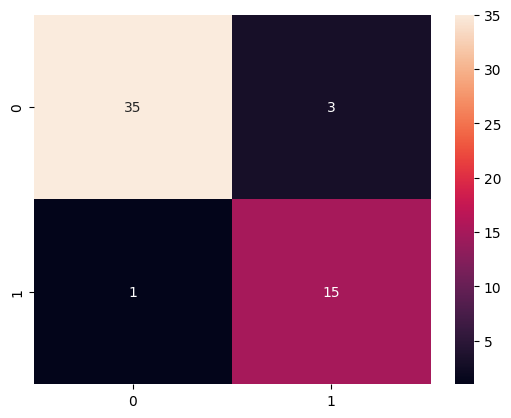

In [22]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')


Naive Bayes
ACCURACY score on train data 85.64814814814815
ACCURACY on test data 88.88888888888889
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.75      0.94      0.83        16

    accuracy                           0.89        54
   macro avg       0.86      0.90      0.88        54
weighted avg       0.91      0.89      0.89        54
 

Confusion Matrix [[33  5]
 [ 1 15]]


<Axes: >

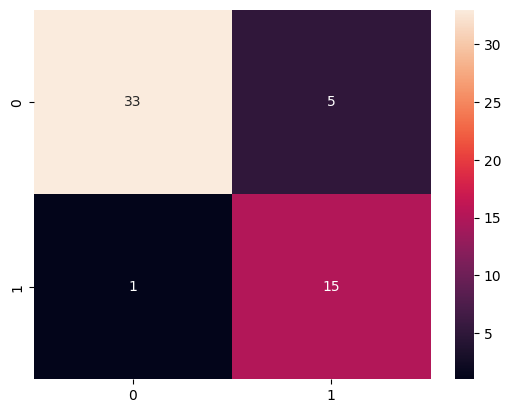

In [23]:
##Naive Bayes
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Logistic Regression
ACCURACY score on train data 83.79629629629629
Accuracy Score on test data 88.88888888888889
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.75      0.94      0.83        16

    accuracy                           0.89        54
   macro avg       0.86      0.90      0.88        54
weighted avg       0.91      0.89      0.89        54
 

Confusion Matrix [[33  5]
 [ 1 15]]


<Axes: >

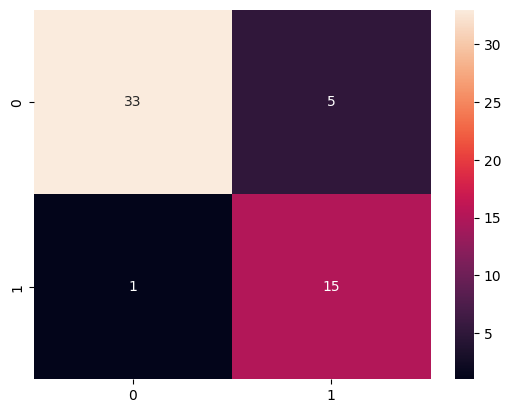

In [24]:
#Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [26]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 401}


Random Forest Classification
ACCURACY score on train data 89.81481481481481
Accuracy Score on test data 88.88888888888889
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.75      0.94      0.83        16

    accuracy                           0.89        54
   macro avg       0.86      0.90      0.88        54
weighted avg       0.91      0.89      0.89        54
 

Confusion Matrix [[33  5]
 [ 1 15]]


<Axes: >

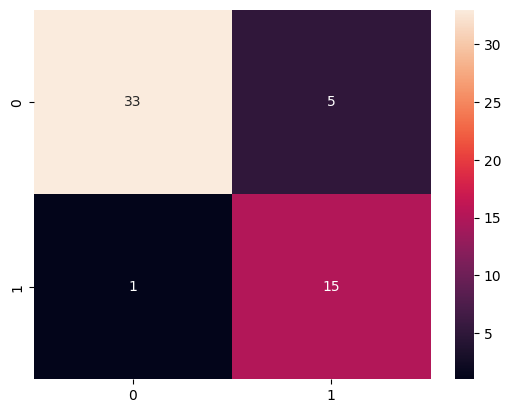

In [27]:
#Random Forest classifier
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 401, criterion = 'entropy', random_state = 101,max_depth=4)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [28]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [29]:
print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.8518518518518519, 0.8518518518518519, 0.8703703703703703, 0.8703703703703703]


SVM
ACCURACY score on train data 83.79629629629629
Accuracy Score on test data 87.03703703703704
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.71      0.94      0.81        16

    accuracy                           0.87        54
   macro avg       0.84      0.89      0.86        54
weighted avg       0.89      0.87      0.87        54
 

Confusion Matrix [[32  6]
 [ 1 15]]


<Axes: >

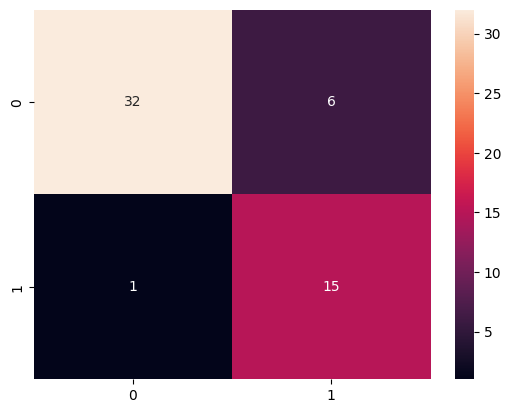

In [30]:
#SVM
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='sigmoid')
sup.fit(X_train,y_train)
pred = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [31]:
#All Model Accuracy with Visual------6 models
Algo=[tree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

,Algorithms,Accuracy
0,Decision Tree,85.185185
1,K Neighbors,92.592593
2,Naive Bayes,88.888889
3,Logistic Regression,88.888889
4,Random Forest,88.888889
5,SVM,87.037037


<Axes: xlabel='Algorithms', ylabel='Accuracy'>

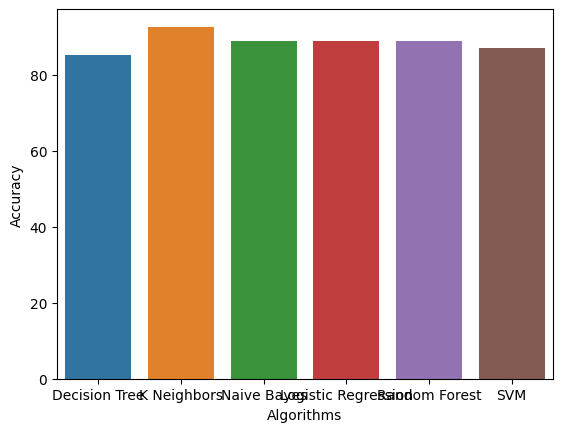

In [32]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)

In [37]:
a=KNN.predict(sc.transform([[70,0,4,110,230,1,1,140,0,3.2,2,0,7]]))
if a==1:
    print ("presence of heart disease")

else:
    print ("absence of heart disease")

presence of heart disease


In [38]:
# Creating a pickle file for the classifier
import pickle
filename = 'KNN-model.pkl'
pickle.dump(KNN, open(filename, 'wb'))